In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [3]:
test = pd.read_csv('test.csv')
test.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001


In [4]:
print(train.shape)
print(test.shape)

(2400, 14)
(600, 12)


In [5]:
train['spacegroup'].describe()

count    2400.000000
mean      141.517917
std        84.715548
min        12.000000
25%        33.000000
50%       194.000000
75%       206.000000
max       227.000000
Name: spacegroup, dtype: float64

In [6]:
test['spacegroup'].describe()

count    600.000000
mean     139.585000
std       85.636414
min       12.000000
25%       33.000000
50%      194.000000
75%      206.000000
max      227.000000
Name: spacegroup, dtype: float64

In [7]:
train['number_of_total_atoms'].value_counts()

80.0    1410
40.0     519
30.0     326
20.0      84
60.0      48
10.0      13
Name: number_of_total_atoms, dtype: int64

In [8]:
train['number_of_total_atoms'].value_counts()

80.0    1410
40.0     519
30.0     326
20.0      84
60.0      48
10.0      13
Name: number_of_total_atoms, dtype: int64

In [9]:
print(train.isnull().sum())
print(test.isnull().sum())

id                            0
spacegroup                    0
number_of_total_atoms         0
percent_atom_al               0
percent_atom_ga               0
percent_atom_in               0
lattice_vector_1_ang          0
lattice_vector_2_ang          0
lattice_vector_3_ang          0
lattice_angle_alpha_degree    0
lattice_angle_beta_degree     0
lattice_angle_gamma_degree    0
formation_energy_ev_natom     0
bandgap_energy_ev             0
dtype: int64
id                            0
spacegroup                    0
number_of_total_atoms         0
percent_atom_al               0
percent_atom_ga               0
percent_atom_in               0
lattice_vector_1_ang          0
lattice_vector_2_ang          0
lattice_vector_3_ang          0
lattice_angle_alpha_degree    0
lattice_angle_beta_degree     0
lattice_angle_gamma_degree    0
dtype: int64


In [10]:
train.set_index('id', inplace=True)
test.set_index('id', inplace=True)

In [11]:
train.head(2)

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
id,,,,,,,,,,,,,
1,33,80.0,0.625,0.375,0.0,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.068,3.4387
2,194,80.0,0.625,0.375,0.0,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.249,2.9210


In [12]:
test.head(2)

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
id,,,,,,,,,,,
1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015


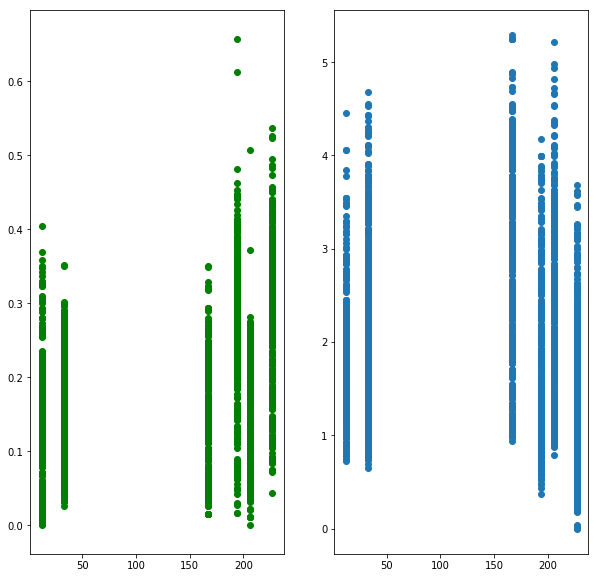

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

plt.subplot(1, 2, 1)
plt.scatter(train['spacegroup'],train['formation_energy_ev_natom'], c='g')

plt.subplot(1, 2, 2)
plt.scatter(train['spacegroup'],train['bandgap_energy_ev'])

plt.show()

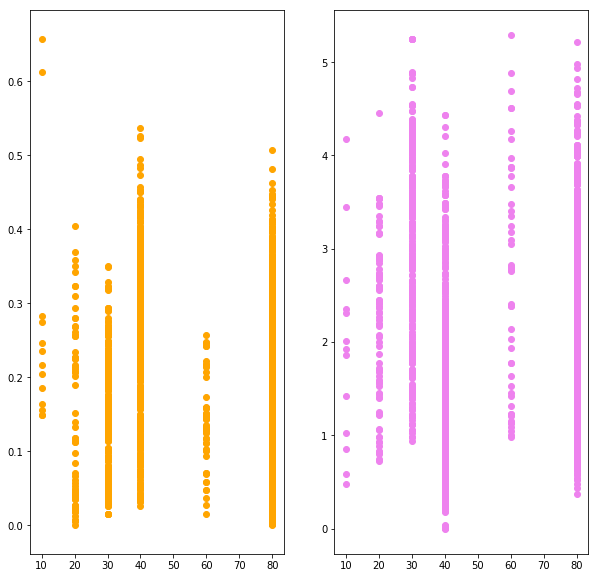

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

plt.subplot(1, 2, 1)
plt.scatter(train['number_of_total_atoms'],train['formation_energy_ev_natom'], c='orange')

plt.subplot(1, 2, 2)
plt.scatter(train['number_of_total_atoms'],train['bandgap_energy_ev'], c='violet')

plt.show()

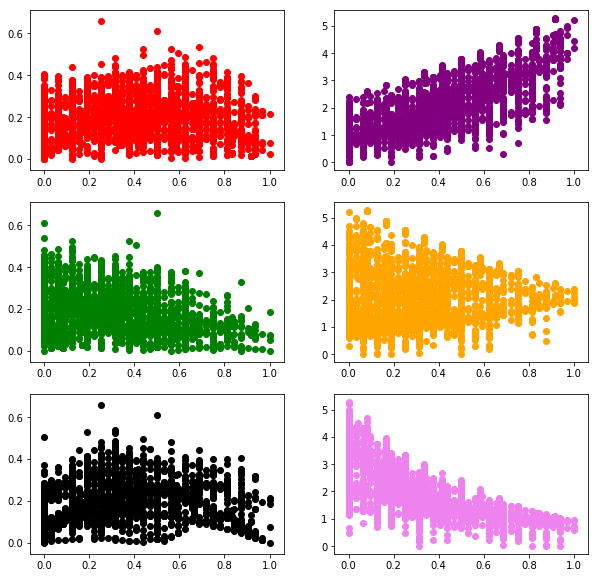

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

plt.subplot(3, 2, 1)
plt.scatter(train['percent_atom_al'],train['formation_energy_ev_natom'], c='red')

plt.subplot(3, 2, 2)
plt.scatter(train['percent_atom_al'],train['bandgap_energy_ev'],c='purple')

plt.subplot(3, 2, 3)
plt.scatter(train['percent_atom_ga'],train['formation_energy_ev_natom'], c='green')

plt.subplot(3, 2, 4)
plt.scatter(train['percent_atom_ga'],train['bandgap_energy_ev'],c='orange')

plt.subplot(3, 2, 5)
plt.scatter(train['percent_atom_in'],train['formation_energy_ev_natom'], c='black')

plt.subplot(3, 2, 6)
plt.scatter(train['percent_atom_in'],train['bandgap_energy_ev'],c='violet')

plt.show()

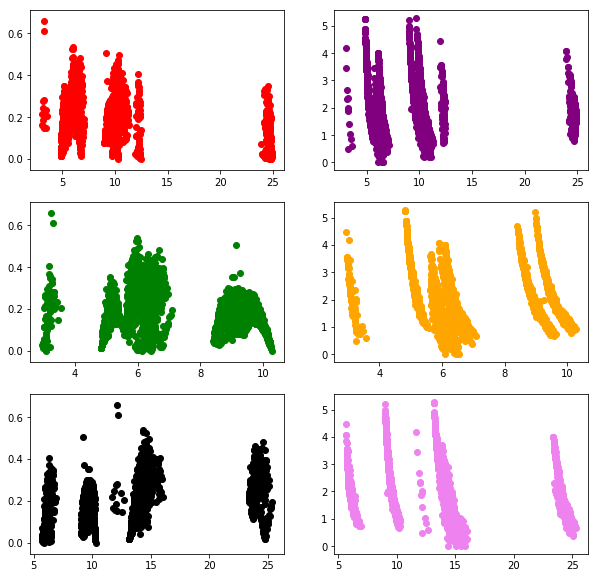

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

plt.subplot(3, 2, 1)
plt.scatter(train['lattice_vector_1_ang'],train['formation_energy_ev_natom'], c='red')

plt.subplot(3, 2, 2)
plt.scatter(train['lattice_vector_1_ang'],train['bandgap_energy_ev'],c='purple')

plt.subplot(3, 2, 3)
plt.scatter(train['lattice_vector_2_ang'],train['formation_energy_ev_natom'], c='green')

plt.subplot(3, 2, 4)
plt.scatter(train['lattice_vector_2_ang'],train['bandgap_energy_ev'],c='orange')

plt.subplot(3, 2, 5)
plt.scatter(train['lattice_vector_3_ang'],train['formation_energy_ev_natom'], c='black')

plt.subplot(3, 2, 6)
plt.scatter(train['lattice_vector_3_ang'],train['bandgap_energy_ev'],c='violet')

plt.show()

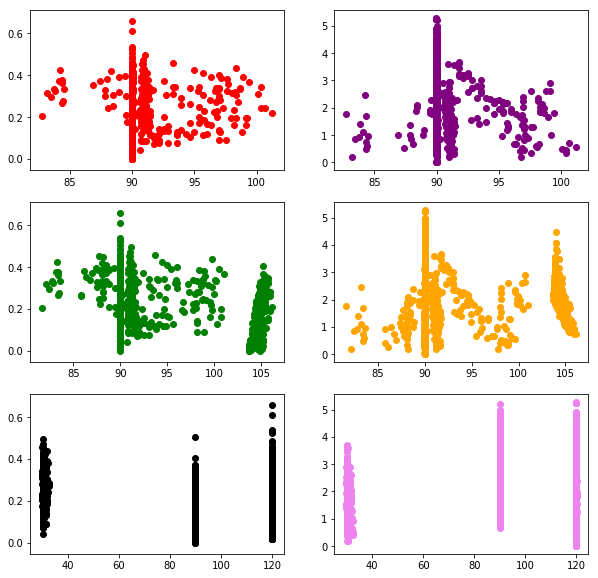

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

plt.subplot(3, 2, 1)
plt.scatter(train['lattice_angle_alpha_degree'],train['formation_energy_ev_natom'], c='red')

plt.subplot(3, 2, 2)
plt.scatter(train['lattice_angle_alpha_degree'],train['bandgap_energy_ev'],c='purple')

plt.subplot(3, 2, 3)
plt.scatter(train['lattice_angle_beta_degree'],train['formation_energy_ev_natom'], c='green')

plt.subplot(3, 2, 4)
plt.scatter(train['lattice_angle_beta_degree'],train['bandgap_energy_ev'],c='orange')

plt.subplot(3, 2, 5)
plt.scatter(train['lattice_angle_gamma_degree'],train['formation_energy_ev_natom'], c='black')

plt.subplot(3, 2, 6)
plt.scatter(train['lattice_angle_gamma_degree'],train['bandgap_energy_ev'],c='violet')

plt.show()

In [69]:
scalar = MinMaxScaler(feature_range=(2,5),copy=False)

In [70]:
X = train[train.columns.tolist()[:11]]
y = train[train.columns.tolist()[11:]]

In [71]:
X[train.columns.tolist()[:11]] = scalar.fit_transform(X)

/home/anuj8june/python3env/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/anuj8june/python3env/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [72]:
X.head(2)

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
id,,,,,,,,,,,
1,2.293023,5.0,3.875,3.125,2.0,2.948323,4.290011,2.534475,3.177965,3.022673,4.001890
2,4.539535,5.0,3.875,3.125,2.0,2.431561,3.323421,4.738130,3.180561,3.022147,4.998306


In [73]:
test.head(2)

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
id,,,,,,,,,,,
1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015


In [74]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X, y['formation_energy_ev_natom'], test_size=0.2, shuffle=True)

In [75]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X, y['bandgap_energy_ev'], test_size=0.2, shuffle=True)

In [25]:
def rmsle(y_pred, y_true):
    error = np.sqrt(np.mean(np.log(y_pred+1) - np.log(y_true+1))**2)
    return error
               

In [26]:
rmsle_score = make_scorer(rmsle, greater_is_better=False)

In [27]:
mae_score = make_scorer(mean_absolute_error, greater_is_better=False)

In [121]:
mlp_grid = {
        'hidden_layer_sizes': [20,40,60,80,100,120,150],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
        'batch_size':['auto'],
        'learning_rate':['constant', 'invscaling', 'adaptive'],
        'learning_rate_init':[0.001],
        'power_t': [0.5],
        'alpha': [0.0001],
        'max_iter': [100,500,1000,2000],
        'early_stopping': [False],
        'warm_start': [False]       
               }

In [29]:
mlp = MLPRegressor()
mlp_gs1 = GridSearchCV(mlp, param_grid = mlp_grid, n_jobs=-1, cv=5,  scoring =  mae_score, verbose=2)

In [30]:
mlp_gs1.fit(X1_train,y1_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_laye

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   4.3s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, lear

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s


[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.7s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, lea

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, l

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=in

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.3s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   6.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=inv

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=a

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adapt

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.3s


[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, l

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   2.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, 

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   2.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, l

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, 

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   2.4s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invsca

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.6s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.7s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_ra

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   2.2s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=in

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.4s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learn

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.4s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adapt

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min


[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.7s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.4s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, lea

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.7s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, 

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, 

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=in

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, l

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=inv

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   2.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, le

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.7s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adapt

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive,

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learn

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant,

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.7s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscal

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscal

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.4min


[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   4.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, l

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learn

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.4s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_i

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.7s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=consta

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constan

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=const

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_ra

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   7.2s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   2.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.3s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, 

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   2.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=ada

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.4s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adapt

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, l

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constan

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=c

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invsc

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=in

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.2min


[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rat

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_ra

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.7s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learn

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, 

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, lea

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.2s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rat

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=in

[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.5s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.3s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rat

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=a

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   0.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.3s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptiv

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.3s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive,

[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.8s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=identity, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adapti

[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, lea

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscal

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.6s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invs

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, lea

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adapti

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learni

[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.6min


[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   7.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   7.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.6s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invsc

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.6s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=i

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invs

[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learnin

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, lear

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   5.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adapti

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learn

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.6s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant,

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   9.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=inv

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  10.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscali

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   7.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=i

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   8.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adapt

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   7.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   8.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   9.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, l

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, lear

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invsca

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  11.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  12.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invsca

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learni

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, le

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   9.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  11.6s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adapti

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 14.6min


[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  10.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adapti

[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  16.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, 

[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constan

[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  20.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=con

[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   4.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_ra

[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  19.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rat

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, 

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  14.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  18.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=ad

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  17.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptiv

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, 

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constan

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  24.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  28.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=c

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invsc

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  20.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  26.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   5.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  18.4s
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=ada

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  25.2s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, l

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adapt

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  22.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=cons

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, lea

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.7s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constan

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invsc

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_ra

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=i

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_ra

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptiv

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  31.5s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.6s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=ad

[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.8s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   2.1s
[CV] activation=logistic, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive,

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001,

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.0

[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 28.9min


[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_in

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.8s
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   5.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learnin

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, 

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   4.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.00

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   4.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_ini

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.00

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, m

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   2.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_r

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  13.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_i

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   2.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   9.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rat

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  13.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, 

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   2.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   8.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   9.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  13.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_ra

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   2.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  19.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   2.7s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  17.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   2.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   2.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   2.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.0

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   2.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.00

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  25.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  15.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_in

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   2.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   9.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.0

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   2.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  19.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   3.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, 

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.0

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  11.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  23.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_ini

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   2.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   2.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.00

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   2.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init

[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 45.0min


[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   2.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   2.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  55.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   2.7s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learnin

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  31.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   5.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learn

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  24.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   4.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learnin

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   2.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  33.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   3.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   3.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   2.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_i

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  47.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   3.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_in

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   3.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   3.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_ra

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   2.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   2.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total= 1.3min
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, l

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   8.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   8.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   2.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   4.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   2.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rat

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=  10.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=  10.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_ini

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   2.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  51.5s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   3.3s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.7s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_i

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=  10.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=  10.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learn

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   4.2s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   3.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   2.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   2.0s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learni

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   2.4s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  25.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  31.1s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_in

[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   4.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   3.8s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=

[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total= 1.0min
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   2.9s
[CV] activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.00

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=constant, learning_rate_init=0.

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   2.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   2.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_ra

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.5s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=tanh, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   2.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=   3.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_ini

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   4.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=20, learning_rate=adaptive, learning_rate_init=0.0

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001,

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=   9.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=constant, learning_rate_init=0.

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_in

[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 73.0min


[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   3.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   2.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, m

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=40, learning_rate=adaptive, learn

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.5s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   7.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001,

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.7s
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_ra

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_ini

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  12.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=invscaling, learning_ra

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   6.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   7.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.00

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.7s
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=60, learning_rate=adaptive, learning_rate_init=0

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=constant, learning_rate_init=

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rat

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  15.1s
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  17.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=invscaling, learning_rate_

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.5s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=   9.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  14.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_ini

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  20.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=80, learning_rate=adaptive, learning_rate_init=0.

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, learning_rate_init=

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.5s
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_r

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  20.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  17.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, l

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  20.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, learning_rat

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   1.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.0

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False, total=   2.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  13.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learn

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False, total=   0.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rat

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   2.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learn

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_r

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  12.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  12.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_ini

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.7s
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, lear

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=120, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_i

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.5s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  16.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_i

[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 90.4min


[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   1.2s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  28.0s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=adam, warm_start=False, total=   1.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, learning_rate_

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.8s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   1.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learnin

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False, total=  32.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learn

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.3s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   0.4s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False, total=   0.9s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=100, power_t=0.5, solver=adam, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=lbfgs, warm_start=False, total=  39.1s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_i

[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=adam, warm_start=False, total=   2.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=500, power_t=0.5, solver=lbfgs, warm_start=False, total=  16.6s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000, power_t=0.5, solver=lbfgs, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate

[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False 
[CV]  activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver=sgd, warm_start=False, total=   1.7s
[CV] activation=relu, alpha=0.0001, batch_size=auto, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, learning_rate_init=

[Parallel(n_jobs=-1)]: Done 5040 out of 5040 | elapsed: 95.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [20, 40, 60, 80, 100, 120, 150], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001], 'batch_size': ['auto'], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': [0.001], 'power_t': [0.5], 'max_iter': [100, 500, 1000, 2000], 'early_stopping': [False], 'warm_start': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score

In [50]:
gs1 = [x[1] for x in mlp_gs1.grid_scores_]
gs1_filter = [i for i in gs1 if i > -0.0275]
gs1_filter

[-0.027324881222103251,
 -0.027312433822422197,
 -0.027271255911330124,
 -0.026847004265067805,
 -0.027199740768081231,
 -0.026368100017607598,
 -0.026515294713040403,
 -0.026546712470932536,
 -0.026999477939856211,
 -0.026979126029224899]

In [52]:
gs1_model = list()
for x  in mlp_gs1.grid_scores_:
    if x[1] > -0.0275:
        gs1_model.append(x)
gs1_model        

[mean: -0.02732, std: 0.00194, params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_iter': 1000, 'power_t': 0.5, 'solver': 'lbfgs', 'warm_start': False},
 mean: -0.02731, std: 0.00128, params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_iter': 2000, 'power_t': 0.5, 'solver': 'lbfgs', 'warm_start': False},
 mean: -0.02727, std: 0.00153, params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hidden_layer_sizes': 120, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'power_t': 0.5, 'solver': 'lbfgs', 'warm_start': False},
 mean: -0.02685, std: 0.00119, params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hidden_laye

In [33]:
mlp = MLPRegressor()
mlp_gs2 = GridSearchCV(mlp, param_grid = mlp_grid, n_jobs=-1, cv=5,  scoring =  mae_score,verbose=2)

In [34]:
mlp_gs2.fit(X2_train,y2_train)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 75.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 119.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 198.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 229.4min
[Parallel(n_jobs=-1)]: Done 5040 out of 5040 | elapsed: 232.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [20, 40, 60, 80, 100, 120, 150], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.0001], 'batch_size': ['auto'], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': [0.001], 'power_t': [0.5], 'max_iter': [100, 500, 1000, 2000], 'early_stopping': [False], 'warm_start': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score

In [44]:
gs2 = [x[1] for x in mlp_gs2.grid_scores_]
gs2_filter = [i for i in gs2 if i > -0.138]
gs2_filter

[-0.13778701667031154,
 -0.13785924246795681,
 -0.13767308452297106,
 -0.13705880660507622,
 -0.13798824019670858,
 -0.13754931893428443,
 -0.13753209377205833,
 -0.1379174772801332,
 -0.13765015984669851,
 -0.13767502832032424,
 -0.13731753363413368,
 -0.13719231392887724]

In [48]:
gs2_model = list()
for x  in mlp_gs2.grid_scores_:
    if x[1] > -0.138:
        gs2_model.append(x)
gs2_model

[mean: -0.13779, std: 0.01179, params: {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 2000, 'power_t': 0.5, 'solver': 'lbfgs', 'warm_start': False},
 mean: -0.13786, std: 0.01387, params: {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hidden_layer_sizes': 20, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 2000, 'power_t': 0.5, 'solver': 'lbfgs', 'warm_start': False},
 mean: -0.13767, std: 0.01250, params: {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hidden_layer_sizes': 40, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 1000, 'power_t': 0.5, 'solver': 'lbfgs', 'warm_start': False},
 mean: -0.13706, std: 0.01135, params: {'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': False, 'hi

### Model 1 NN

In [66]:
t = test.columns.tolist()
y_test = test.copy()
y_test[t] = scalar.fit_transform(test)
y_test.head(2)

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
id,,,,,,,,,,,
1,2.293023,5.0,2.5625,3.451693,3.064616,3.025389,4.491563,2.602521,3.090841,2.935899,4.001878
2,2.293023,5.0,4.2500,2.774154,2.000000,2.936887,4.280558,2.525057,3.091556,2.936158,4.001907


In [122]:
m1_nn = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', early_stopping=False, hidden_layer_sizes=120, learning_rate='constant', learning_rate_init=0.001, max_iter=2000, power_t=0.5, solver='lbfgs', warm_start=False)


In [123]:
m1_nn.fit(X, y['formation_energy_ev_natom'])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=120, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [124]:
p1 = m1_nn.predict(y_test)

In [125]:
print(p1.shape)

(600,)


### Model 2 NN

In [126]:
m2_nn = MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', early_stopping=False, hidden_layer_sizes=120, learning_rate='constant', learning_rate_init=0.001, max_iter=500, power_t=0.5, solver='lbfgs', warm_start=False)       

In [127]:
m2_nn.fit(X, y['bandgap_energy_ev'])

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=120, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [128]:
p2 = m2_nn.predict(y_test)

In [129]:
p2.shape

(600,)

In [130]:
test['formation_energy_ev_natom'] = p1
test['bandgap_energy_ev'] = p2

In [131]:
test.head(2)

,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
id,,,,,,,,,,,,,
1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006,0.207051,1.668168
2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015,0.069204,3.997254


In [132]:
dfcsv = test[['formation_energy_ev_natom','bandgap_energy_ev']]
dfcsv.head()

,formation_energy_ev_natom,bandgap_energy_ev
id,,
1,0.207051,1.668168
2,0.069204,3.997254
3,0.147716,3.436736
4,0.035946,3.044159
5,0.143977,1.650324


In [137]:
for i,row in dfcsv[dfcsv['formation_energy_ev_natom'] <= 0.0].iterrows():
    dfcsv.at[i,'formation_energy_ev_natom'] = dfcsv['formation_energy_ev_natom'].mean()

In [139]:
#dfcsv.to_csv('sub2_nn.csv')